# Imports

In [1]:
import torch 
import torch.nn as nn
import torchvision
import pandas as pd
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import warnings
import time,sys
import copy
import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary
from sklearn.utils import shuffle
!pip install torchviz
from torchviz import make_dot, make_dot_from_trace

# Text pre-processing
import string
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
import nltk

# Data Pre-processing
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import CountVectorizer


#keras
import numpy as np
from keras.layers import Bidirectional
from tensorflow import keras
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import pandas as pd

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=3772c66c16e5ef50f39fd4d16ee37ee33faec06b2bbf1fe7bcc4bd3803b63181
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


# Pre-Processing

In [2]:
# Dataset-2
!gdown --id 1NNH-hji6uzKIkJq4Fjup51gFIh6gBAVt

Downloading...
From: https://drive.google.com/uc?id=1NNH-hji6uzKIkJq4Fjup51gFIh6gBAVt
To: /content/Dataset 2.csv
100% 999k/999k [00:00<00:00, 68.1MB/s]


In [3]:
csv_file = pd.read_csv('/content/Dataset 2.csv',encoding = "ISO-8859-1")

In [4]:
#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)
csv_file.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,text,polarity
0,"just had a real good moment. i missssssssss him so much,",0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8,0
3,"@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.",0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [5]:
csv_file.drop(10313,inplace=True)

## Text Processing

[Kaggle Text Processing Sample](https://www.kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing)

In [6]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [7]:
# Lower Casing
csv_file['text'] = csv_file['text'].str.lower()

# Removal of Punctuations
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
csv_file['text'] = csv_file['text'].apply(lambda text: remove_punctuation(text))

# Removal of stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

csv_file['text'] = csv_file['text'].apply(lambda text: remove_stopwords(text))

# Removal of Frequent words
cnt = Counter()
for text in csv_file['text'].values:
    for word in text.split():
        cnt[word] += 1
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

csv_file['text'] = csv_file['text'].apply(lambda text: remove_freqwords(text))

# Removal of Rare words
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

csv_file['text'] = csv_file['text'].apply(lambda text: remove_rarewords(text))

# # Stemming [NOT USEFUL]
# stemmer = PorterStemmer()
# def stem_words(text):
#     # return wnl.lemmatize(word) if wnl.lemmatize(word).endswith('e') for word in text.split() else stemmer.stem(word) for word in text.split()
#     # return " ".join([wnl.lemmatize(word) if wnl.lemmatize(word).endswith('e') for word in text.split() else stemmer.stem(word) for word in text.split()])
#     return " ".join([stemmer.stem(word) for word in text.split()])
# pt = csv_file['text'].apply(lambda text: stem_words(text))

# Lemmatization
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

csv_file['text'] = csv_file['text'].apply(lambda text: lemmatize_words(text))

# # Chat Words Conversion
# chat_words_map_dict = {}
# chat_words_list = []
# for line in csv_file['text'].str.split("\n"):
#     line = ''.join(line)
#     # print(line)
#     if line != "":
#         cw = line.split("=")[0]
#         print(cw)
#         cw_expanded = line.split("=")[1]
#         print(cw_expanded)
#         chat_words_list.append(cw)
#         chat_words_map_dict[cw] = cw_expanded
# chat_words_list = set(chat_words_list)

# def chat_words_conversion(text):
#     new_text = []
#     for w in text.split():
#         if w.upper() in chat_words_list:
#             new_text.append(chat_words_map_dict[w.upper()])
#         else:
#             new_text.append(w)
#     return " ".join(new_text)

# pt = csv_file['text'].apply(lambda text: chat_words_conversion(text))

In [8]:
csv_file.columns = csv_file.columns.str.strip()

In [9]:
# common Words
cnt = Counter()
for text in csv_file['text'].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(5)

[('go', 878), ('get', 505), ('u', 499), ('time', 457), ('make', 430)]

In [10]:
# Save a Copy
preserve_csv = csv_file
preserve_csv.to_csv('modified_data.csv',index=False)
data_file = pd.read_csv('modified_data.csv')
data_file = data_file.astype(str)
data_file.dtypes

text        object
polarity    object
dtype: object

In [11]:
# Load Columns to List
text_file=[]
for idx in range(0,len(data_file)):
  word = data_file['text'][idx]
  text_file.append(word)

# Word count
per_line_words = []
for idx in range(0,len(text_file)):
  ss = str(text_file[idx])
  xx = ss.split()
  per_line_words.append(len(xx))

In [12]:
# Total Words
sum(per_line_words) #85529
# Maximum Word in a line
max(per_line_words) #50
# Minimum Word in a line 
min(per_line_words) #1
# Unique Words
uniq_vocab  = set()
type(uniq_vocab)
for idx in range(0,len(text_file)):
    mm = str(text_file[idx]).split()
    uniq_vocab.add(str(mm))

In [13]:
# uniq_vocab
vocab_size = len(uniq_vocab)
# max sentece length
sentence_len = max(per_line_words)

# Model Design in Keras

In [14]:
# One HOt Encoder
One_hot_Encoding = [one_hot(words,vocab_size) for words in text_file]


In [15]:
# Pad Sequence
transform_numpy = pad_sequences(One_hot_Encoding,padding='pre',maxlen=sentence_len)

In [16]:
X = np.array(transform_numpy)
label_encoder = LabelEncoder()
y = np.array(label_encoder.fit_transform(data_file.polarity))

In [17]:
# Train Test Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [18]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [20]:
# Bidirectional LSTM designing
# https://keras.io/examples/nlp/bidirectional_lstm_imdb/
# model = Sequential()
inputs = keras.Input(shape=(None,), dtype="float32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(vocab_size, 128)(inputs)
# Add 4 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 128)         1311360   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         98816     
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         98816     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 1)                 129   

In [21]:
# Train Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
train_model = model.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
83/83 [==============================] - 32s 174ms/step - loss: 0.4049 - accuracy: 0.8337 - val_loss: 0.2566 - val_accuracy: 0.9084
Epoch 2/10
83/83 [==============================] - 11s 138ms/step - loss: 0.1625 - accuracy: 0.9442 - val_loss: 0.2598 - val_accuracy: 0.9186
Epoch 3/10
83/83 [==============================] - 12s 139ms/step - loss: 0.0776 - accuracy: 0.9747 - val_loss: 0.2332 - val_accuracy: 0.9161
Epoch 4/10
83/83 [==============================] - 12s 139ms/step - loss: 0.0474 - accuracy: 0.9865 - val_loss: 0.2956 - val_accuracy: 0.9108
Epoch 5/10
83/83 [==============================] - 12s 139ms/step - loss: 0.0273 - accuracy: 0.9916 - val_loss: 0.3918 - val_accuracy: 0.9016
Epoch 6/10
83/83 [==============================] - 11s 139ms/step - loss: 0.0152 - accuracy: 0.9953 - val_loss: 0.4909 - val_accuracy: 0.8968
Epoch 7/10
83/83 [==============================] - 11s 138ms/step - loss: 0.0122 - accuracy: 0.9964 - val_loss: 0.4937 - val_accuracy: 0.9050

In [22]:
y_pred=np.round(model.predict(X_test))

# Result Analysis

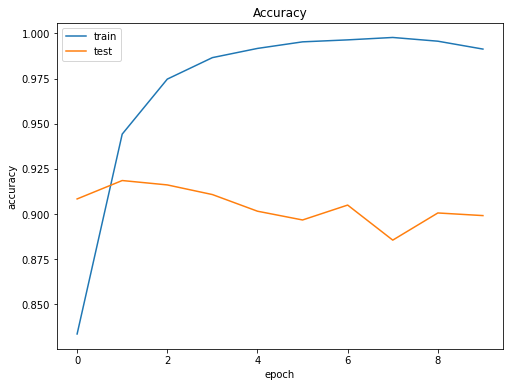

In [23]:
# Accuracy
plt.figure(figsize=(8, 6))
plt.title("Accuracy")
plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

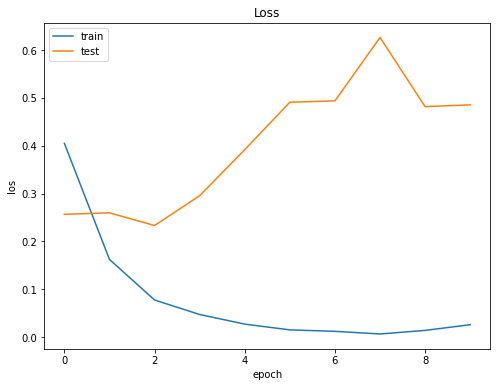

In [24]:
# Loss
plt.figure(figsize=(8, 6))
plt.title("Loss")
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.ylabel('los')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
accuracy_score(y_test,y_pred)

0.8991759573436743

In [26]:
f1_score(y_test, y_pred, average='micro')

0.8991759573436743

In [27]:
precision_score(y_test, y_pred, average='micro')

0.8991759573436743

In [28]:
recall_score(y_test, y_pred, average='micro')

0.8991759573436743

In [29]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[1495,  107],
       [ 101,  360]])

# Model Design in pyTorch

## Design Model

In [19]:
class Sequences(Dataset):
    def __init__(self, data):
        self.labels = data.polarity.tolist()
    
    def __getitem__(self, i):
        return self.sequences[i, :].toarray(), self.labels[i]
    
    def __len__(self):
        return self.sequences.shape[0]

In [40]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Set initial hidden and cell states 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

## Data Process For Training

In [27]:
class Dictionary(object):
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0
    
    def add_word(self, word):
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            self.idx += 1
    
    def __len__(self):
        return len(self.word2idx)

class Corpus(object):
    def __init__(self):
        self.dictionary = Dictionary()

    def get_data(self, path, batch_size=20):
        # Add words to the dictionary
        with open(path, 'r') as f:
            tokens = 0
            for line in f:
                words = line.split() + ['<eos>']
                tokens += len(words)
                for word in words: 
                    self.dictionary.add_word(word)  
        
        # Tokenize the file content
        ids = torch.LongTensor(tokens)
        token = 0
        with open(path, 'r') as f:
            for line in f:
                words = line.split() + ['<eos>']
                for word in words:
                    ids[token] = self.dictionary.word2idx[word]
                    token += 1
        num_batches = ids.size(0) // batch_size
        ids = ids[:num_batches*batch_size]
        return ids.view(batch_size, -1)

In [37]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
sequence_length = 28
input_size = 28
hidden_size = 128
num_layers = 3
num_classes = 2
batch_size = 32
num_epochs = 5
learning_rate = 0.01

print(device)

cpu


In [36]:
corpus = Corpus()
text_full_data = csv_file['text'].astype(str)

file = open('/content/dump.txt', 'w')
file.write(str(text_full_data))
file.close()

ids = corpus.get_data('/content/dump.txt', batch_size)
vocab_size = len(corpus.dictionary)

print(vocab_size,num_batches,sep=' ')

112 1


In [26]:
# Shuffle DatasetFrame
csv_file = csv_file.sample(frac=1)

# Column Naming
csv_file.columns = ['text','polarity']

# Train Test Splitting
msk = np.random.rand(len(csv_file)) <= 0.8
train_data = csv_file[msk]
test_data = csv_file[~msk]

In [41]:
TRAIN_seq = Sequences(train_data)
TEST_seq = Sequences(test_data)

train_loader = DataLoader(TRAIN_seq,batch_size=batch_size)
test_loader = DataLoader(TEST_seq,batch_size=batch_size)

model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total)) 